<a href="https://colab.research.google.com/github/nathsmo/Elements-of-ML/blob/master/Laboratorio_7_EoML_Nathalia_Morales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 7

En este laboratorio usaremos dos nuevos tipos de regresión: ridge y lasso. Estas son regresiones lineales pero que utilizan diferente criterio al de mínimos cuadrados para minimizar el error. Los usaremos sobre la base de datos de carros de boston de sklearn

In [0]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.api as sm

import statsmodels
import statsmodels.formula.api as smf

from sklearn.datasets import load_boston

print("Todos los paquetes han sido importados:")

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Todos los paquetes han sido importados:


## Código para hacer las regresiones

Muestro un ejemplo del uso de la regresión por regularización Ridge. Está basado en el artículo [https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/](https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/) que sugiero leer completo. Nota: en lugar de utilizar p diferentes predictores, el artículo hace la regularización sobre los coeficientes de una regresión polinómica de grado p. Sin embargo, el concepto es igual.



Haremos la regularización sobre los datos de boston tomando la variable 'Price' como target y el resto como predictores. Recuerda qué significa cada variable en la [documentación de Boston](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html)

In [0]:
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)

# Agregamos la columna de 'Price' como target
boston_df['Price']=boston.target

# newX serán los predictores menos 'Price' y newY será el target, solo 'Price'
dataX = boston_df.drop('Price',axis=1)

# estandarizamos los datos en X
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
StandardScaler(copy=True, with_mean=True, with_std=True)

newX = pd.DataFrame(scaler.fit_transform(dataX),columns=list(dataX))

print(newX[0:3]) # check
newY=boston_df['Price']
print(newY[0:3])

       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  
0    24.0
1    21.6
2    34.7
Name: Price, dtype: float64


No haremos ahora ningun tipo de validación o validación cruzada, así que usaremos directamente newX y newY para general el modelo

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
rss: 11078.784632545761
intercept: 22.532806324110677
coef CRIM: -0.9280614242092187
coef ZN: 1.0814141715659114
coef INDUS: 0.14065717074745454
coef CHAS: 0.6817747237916101
coef NOX: -2.0564369218460308
coef RM: 2.6743177141907815
coef AGE: 0.019401430787533248
coef DIS: -3.1037748908714
coef RAD: 2.661490409049492
coef TAX: -2.0760975657383356
coef PTRATIO: -2.0605231776166004
coef B: 0.8492642441337194
coef LSTAT: -3.7434962114948194
[11078.784632545761, 22.532806324110677, -0.9280614242092187, 1.0814141715659114, 0.14065717074745454, 0.6817747237916101, -2.0564369218460308, 2.6743177141907815, 0.019401430787533248, -3.1037748908714, 2.661490409049492, -2.0760975657383356, -2.0605231776166004, 0.8492642441337194, -3.7434962114948194]


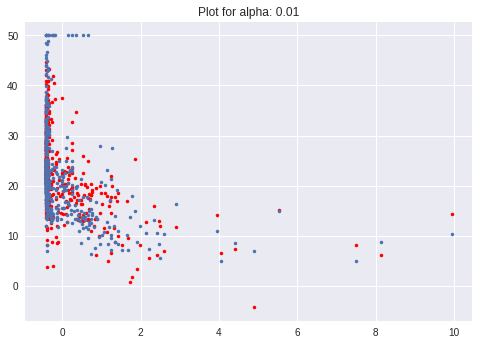

In [0]:
from sklearn.linear_model import Ridge

#En el argumento de Ridge escogemos el valor lambda (o alpha) de la regularización, escojo 0.01, uno bajo para comenzar

ridgereg = Ridge(alpha=0.01)

ridgeModel = ridgereg.fit(newX,newY)
y_pred = ridgereg.predict(newX)

rss = sum((y_pred-newY)**2)
ret = [rss]
ret.extend([ridgereg.intercept_])
ret.extend(ridgereg.coef_)

# Esta gráfica muestra la proyección de los ejes 'CRIM' y 'PRICE'
plt.plot(newX['CRIM'],y_pred,'.',color = 'red')
plt.plot(newX['CRIM'],newY,'.')
plt.title('Plot for alpha: 0.01')

names = ['rss', 'intercept']
cols = list(newX)
print(cols)

for i in cols:
  names.append('coef '+i)

for i in range(0,len(ret)):
  print(names[i]+': '+str(ret[i]))

print(ret)

# Ejercicios

## 1.   Haz una regresión lineal múltiple con los mismo datos de entrenamiento y compara los coeficientes obtenidos con regularización ridge a los obtenidos con una regresión lineal múltiple. ¿Son siempre menores los coeficientes en la regularización? Calcula la norma de los coeficientes para comparar.




In [0]:
model = sm.OLS(newY, newX).fit()
#model.summary(xname=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT'])

In [0]:
res1 = model.params
res2 = ret[2:]
columns = ['Ridge_Regression', 'Multi_Regression']
newdf = pd.DataFrame(index=cols, columns=columns)
newdf['Ridge_Regression'] = res2
newdf['Multi_Regression'] = res1
newdf['Dif'] = newdf['Ridge_Regression'] - newdf['Multi_Regression']
newdf

,Ridge_Regression,Multi_Regression,Dif
CRIM,-0.928061,-0.928146,0.000085
ZN,1.081414,1.081569,-0.000154
INDUS,0.140657,0.140900,-0.000243
CHAS,0.681775,0.681740,0.000035
NOX,-2.056437,-2.056718,0.000281
RM,2.674318,2.674230,0.000088
AGE,0.019401,0.019466,-0.000065
DIS,-3.103775,-3.104044,0.000269
RAD,2.661490,2.662218,-0.000727
TAX,-2.076098,-2.076782,0.000684


## Resultados Pregunta 1

* Por medio de la tabla notamos que los resultados de los coeficientes en Ridge son en promedio mayores a aquellos en Multiple Regression pero por diferencia smuy pequenas.

## 2.   Repite la regresión Ridge de antes pero ahora utiliza un grupo de validación para obtener tu RMSE de prueba (no el de entrenamiento)

In [0]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from math import sqrt
ridgereg = Ridge(alpha=1)

X_train, X_test, y_train, y_test = train_test_split(newX, newY, test_size=0.4, random_state=42)
model = ridgereg.fit(X_train,y_train)
y_pred = ridgereg.predict(X_test)
print(sqrt(metrics.mean_squared_error(y_test, y_pred)))

4.6737492649120025


## 3.   Usando 100 diferentes valores de alpha, haz una gráfica de RMSE de prueba contra alpha

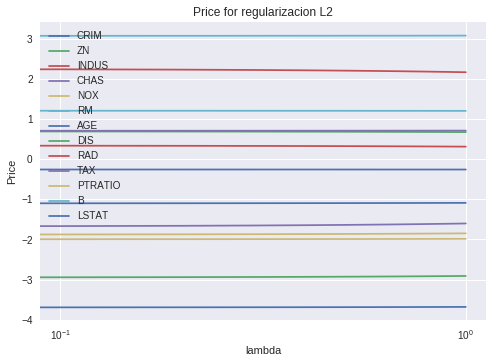

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(newX, newY, test_size=0.25, random_state=42)
n_lambdas = 100

lambdas = np.linspace(0,1,11)
coefs = []

for l in lambdas:
    ridge = linear_model.Ridge(alpha=l, fit_intercept=True)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    
coefs = np.array(coefs)

ax = plt.gca()

for i in range(len(cols)):
    ax.plot(lambdas, coefs[:,i], label=cols[i])
ax.set_xscale('log')
plt.xlabel('lambda')
plt.ylabel('Price')
plt.title('Price for regularizacion L2')
plt.axis('tight')
plt.legend()
plt.show()


## 4.   ¿Hay algún valor de alpha que parezca minimizar el RMSE? Si no parece haberlo, considera repetir 2. usando otros 100 valores de alpha (quizá de 1 a 100)

### Parece ser que el valor mas cercano para minimizar el RMSE es 10^4

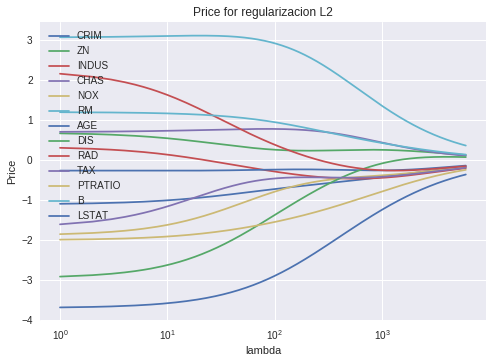

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(newX, newY, test_size=0.25, random_state=42)

lambdas = range(1,6000)
coefs = []

for l in lambdas:
    ridge = linear_model.Ridge(alpha=l, fit_intercept=True)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    
coefs = np.array(coefs)

ax = plt.gca()

for i in range(len(cols)):
    ax.plot(lambdas, coefs[:,i], label=cols[i])
ax.set_xscale('log')
plt.xlabel('lambda')
plt.ylabel('Price')
plt.title('Price for regularizacion L2')
plt.axis('tight')
plt.legend()
plt.show()

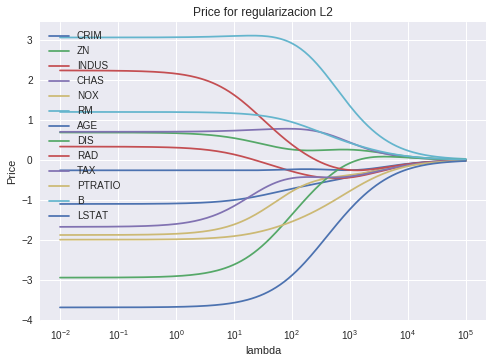

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(newX, newY, test_size=0.25, random_state=42)

n_lambdas = 200

lambdas = np.logspace(-2, 5, n_lambdas)
coefs = []

for l in lambdas:
    ridge = linear_model.Ridge(alpha=l, fit_intercept=True)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    
coefs = np.array(coefs)

ax = plt.gca()

for i in range(len(cols)):
    ax.plot(lambdas, coefs[:,i], label=cols[i])
ax.set_xscale('log')
plt.xlabel('lambda')
plt.ylabel('Price')
plt.title('Price for regularizacion L2')
plt.axis('tight')
plt.legend()
plt.show()